In [3]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img = image.load_img('Covid19-dataset/test/Covid/0108.jpeg')

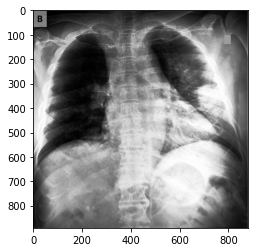

In [5]:
plt.imshow(img)

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('Covid19-dataset/train/', target_size=(224,224), batch_size=10)
test_dataset = test.flow_from_directory('Covid19-dataset/test/', target_size=(224,224), batch_size=10)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [77]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print('\nReached 95% accuracy so cancelling training!')
            
            self.model.stop_training = True
    

### END CODE HERE


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
  
])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 28, 28, 128)     

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model_fit = model.fit(train_dataset,
            steps_per_epoch = 3,
            epochs = 35,
            validation_data = test_dataset, callbacks=myCallback())

Epoch 1/35
3/3 [==============================] - 4s 1s/step - loss: 2.3353 - accuracy: 0.4333 - val_loss: 1.1023 - val_accuracy: 0.3030
Epoch 2/35
3/3 [==============================] - 3s 1s/step - loss: 1.0923 - accuracy: 0.3333 - val_loss: 1.1441 - val_accuracy: 0.3939
Epoch 3/35
3/3 [==============================] - 3s 1s/step - loss: 1.1298 - accuracy: 0.4000 - val_loss: 1.0805 - val_accuracy: 0.3939
Epoch 4/35
3/3 [==============================] - 4s 1s/step - loss: 1.0323 - accuracy: 0.5667 - val_loss: 1.0675 - val_accuracy: 0.3939
Epoch 5/35
3/3 [==============================] - 3s 1s/step - loss: 1.1502 - accuracy: 0.2667 - val_loss: 1.0470 - val_accuracy: 0.3939
Epoch 6/35
3/3 [==============================] - 3s 1s/step - loss: 1.0090 - accuracy: 0.5667 - val_loss: 1.0232 - val_accuracy: 0.5455
Epoch 7/35
3/3 [==============================] - 4s 1s/step - loss: 0.9979 - accuracy: 0.5667 - val_loss: 0.9558 - val_accuracy: 0.5000
Epoch 8/35
3/3 [=========================

In [12]:
#input1 = ImageDataGenerator(rescale=1/255)
#a = input1.flow_from_directory('0105.png', target_size=(224,224))

NotADirectoryError: [WinError 267] The directory name is invalid: '0105.png'

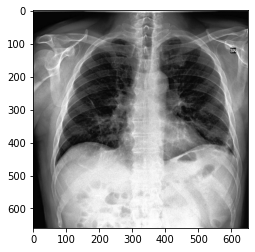

In [62]:
img2 = image.load_img('Covid19-dataset/test/Covid/0100.jpeg')
plt.imshow(img2)

In [34]:
 input1 = tf.keras.utils.img_to_array(
    img2, data_format=None, dtype=None
)

In [35]:
input1.shape

(659, 651, 3)

In [63]:
tf.image.resize(
    img2, size=(224,224), method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[249.08122  , 249.08122  , 249.08122  ],
        [241.47621  , 241.47621  , 241.47621  ],
        [240.73438  , 240.73438  , 240.73438  ],
        ...,
        [212.0204   , 212.0204   , 212.0204   ],
        [212.55057  , 212.55057  , 212.55057  ],
        [217.       , 217.       , 217.       ]],

       [[ 83.69601  ,  83.69601  ,  83.69601  ],
        [ 66.987724 ,  66.987724 ,  66.987724 ],
        [ 57.936493 ,  57.936493 ,  57.936493 ],
        ...,
        [  6.9103985,   6.9103985,   6.9103985],
        [  6.031248 ,   6.031248 ,   6.031248 ],
        [  7.609373 ,   7.609373 ,   7.609373 ]],

       [[  4.787527 ,   4.787527 ,   4.787527 ],
        [  4.680141 ,   4.680141 ,   4.680141 ],
        [  5.4414415,   5.4414415,   5.4414415],
        ...,
        [  5.965995 ,   5.965995 ,   5.965995 ],
        [  4.1272326,   4.1272326,   4.1272326],
        [  6.       ,   6.       ,   6.       ]],

       ...,

     

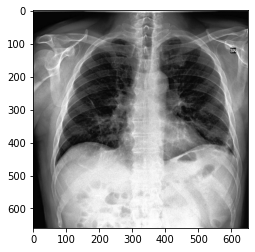

In [37]:
plt.imshow(img2)

In [38]:
 input1 = tf.keras.utils.img_to_array(
    img2, data_format=None, dtype=None
)

In [41]:
input1.shape

(659, 651, 3)

In [64]:
array = tf.keras.preprocessing.image.img_to_array(img2)

In [65]:
array.shape

(659, 651, 3)

In [66]:
a = tf.image.resize(
    img2, size=(224,224), method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
)

In [67]:
a

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[249.08122  , 249.08122  , 249.08122  ],
        [241.47621  , 241.47621  , 241.47621  ],
        [240.73438  , 240.73438  , 240.73438  ],
        ...,
        [212.0204   , 212.0204   , 212.0204   ],
        [212.55057  , 212.55057  , 212.55057  ],
        [217.       , 217.       , 217.       ]],

       [[ 83.69601  ,  83.69601  ,  83.69601  ],
        [ 66.987724 ,  66.987724 ,  66.987724 ],
        [ 57.936493 ,  57.936493 ,  57.936493 ],
        ...,
        [  6.9103985,   6.9103985,   6.9103985],
        [  6.031248 ,   6.031248 ,   6.031248 ],
        [  7.609373 ,   7.609373 ,   7.609373 ]],

       [[  4.787527 ,   4.787527 ,   4.787527 ],
        [  4.680141 ,   4.680141 ,   4.680141 ],
        [  5.4414415,   5.4414415,   5.4414415],
        ...,
        [  5.965995 ,   5.965995 ,   5.965995 ],
        [  4.1272326,   4.1272326,   4.1272326],
        [  6.       ,   6.       ,   6.       ]],

       ...,

     

In [72]:
 input1 = tf.keras.utils.img_to_array(
    img2, data_format=None, dtype=None
)

In [69]:
input1.shape

(659, 651, 3)

In [ ]:
z = np.random.rand(1,224,224,3)

In [73]:
a = np.reshape(a, (1,224,224,3))

In [74]:
a.shape

(1, 224, 224, 3)

In [75]:
model.predict(a)

array([[1., 0., 0.]], dtype=float32)

In [76]:
np.argmax(model.predict(a))

0

In [ ]:
img3 = image.load_img('0107.jpeg')

In [ ]:
f = tf.image.resize(
    img3, size=(224,224), method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
)

In [ ]:
f

In [ ]:
f = np.reshape(f,(1,224,224,3))

In [ ]:
model.predict(f)

In [ ]:
np.argmax(model.predict(f))

In [ ]:
z = np.random.rand(1,224,224,3)

In [ ]:
ans1 = model.predict(z)

In [ ]:
ans1

In [13]:
import cv2

In [233]:
img4 = image.load_img('Covid19-dataset/test/Viral Pneumonia/0105.jpeg')

In [234]:
f = tf.image.resize(
    img4, size=(224,224), method='bilinear', preserve_aspect_ratio=False,
    antialias=False, name=None
)

In [235]:
f

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [216]:
f/255

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.06629463, 0.06629463, 0.06629463],
        [0.05294118, 0.05294118, 0.05294118],
        [0.05341824, 0.05341824, 0.05341824],
        ...,
        [0.04509804, 0.04509804, 0.04509804],
        [0.04834122, 0.04834122, 0.04834122],
        [0.0219921 , 0.0219921 , 0.0219921 ]],

       [[0.06053922, 0.06053922, 0.06053922],
        [0.05874912, 0.05874912, 0.05874912],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05361956, 0.05361956, 0.05361956],
        [0.02131383, 0.02131383, 0.02131383]],

       [[0.06053922, 0.06053922, 0.06053922],
        [0.05807073, 0.05807073, 0.05807073],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.02287179, 0.02287179, 0.02287179]],

       ...,

       [[0.49004725, 0.49004725, 0.49004725],
        [0.52

In [236]:
f = np.reshape(f,(1,224,224,3))

In [237]:
f.shape

(1, 224, 224, 3)

In [238]:
ans1 = np.argmax(model.predict(f))

In [239]:
ans1

2

In [240]:
list1 = list(train_dataset.class_indices.keys())

In [241]:
list2 = list(train_dataset.class_indices.values())

In [101]:
list1

['Covid', 'Normal', 'Viral Pneumonia']

In [102]:
list2

[0, 1, 2]

In [62]:
print(list1[ans1])

Viral Pneumonia


In [1]:
import pickle

In [5]:
input1 = image.load_img('input_image.jpg')

NameError: name 'image' is not defined

In [243]:
model.save('./updated_tf_model.h5')